[1. Import Dependencies](#Import)
<hr>

### 1. Import Dependencies <a id='Import'></a>

In [3]:
from mongoHandler import mongoHandler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
mongoHandler = mongoHandler()
mongoHandler.pullMongoDB("pastdata.csv")

In [5]:
# This is optional as our data does not have any null values, but may be useful for other data sets
df = pd.read_csv("pastdata.csv")
df_detail_nan = []

for season in df['season'].unique():
    df_nan = df[df['season'] == season]
    series_nan = df_nan.isnull().sum()
    df_nan = series_nan.to_frame(name="Nan_Count")
    df_nan = df_nan.rename_axis('Col_Name').reset_index()
    df_nan['season'] = season
    df_detail_nan.append(df_nan)

df_detail_nan = pd.concat(df_detail_nan, ignore_index=True)

df_per_season_nan = df_detail_nan[['season','Nan_Count']].groupby("season").sum().reset_index()
df_per_season_nan = df_per_season_nan.sort_values(by=['season'], ascending=True)

fig = plt.figure(figsize = (22, 4))
sns.lineplot(data=df_per_season_nan, x="season", y="Nan_Count", sort=True)
plt.ylim(0)
plt.ylabel('Nan Count', fontsize=12)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light', fontsize=10)
plt.xlabel('Season', fontsize=12)
plt.margins(x=0)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'pastdata.csv'

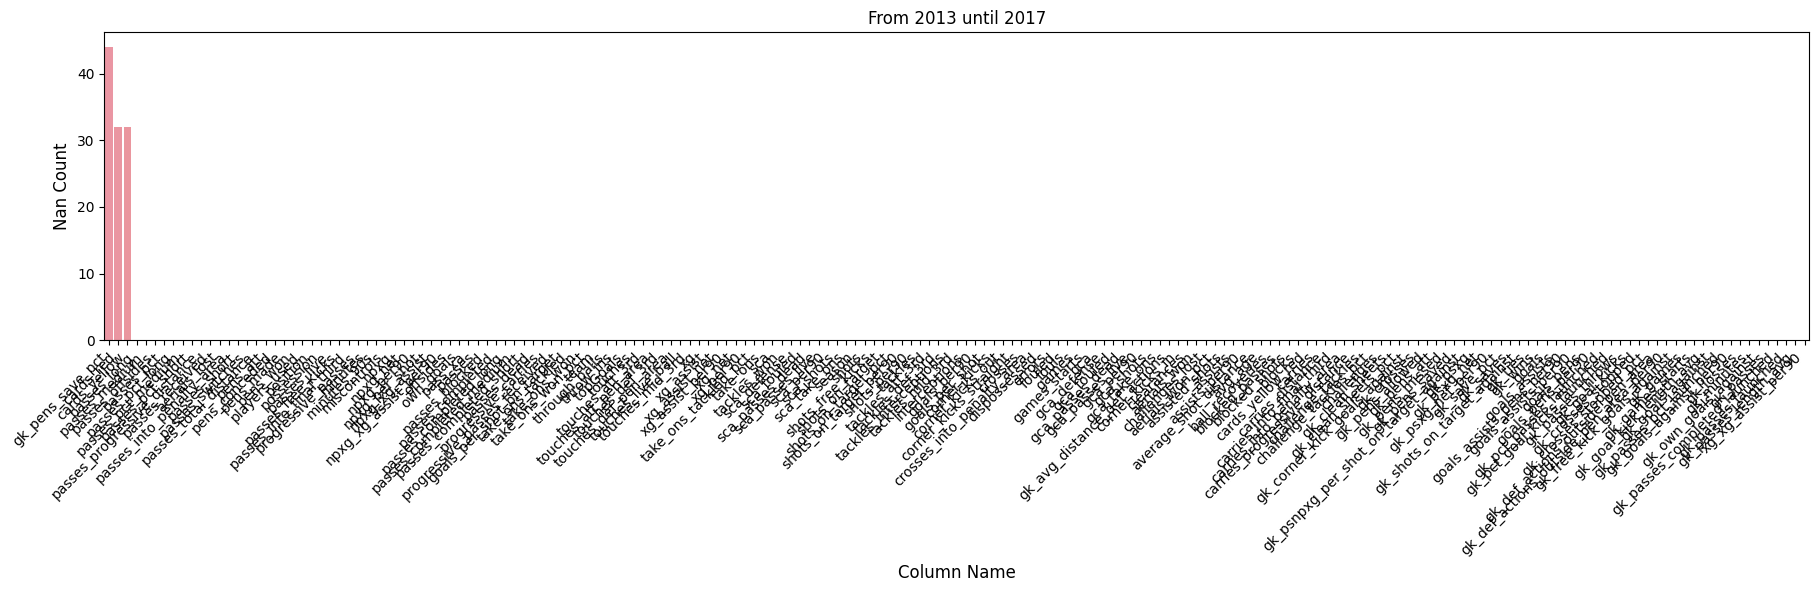

In [7]:

df = pd.read_csv("pastdata.csv")
df_detail_nan = []

for season in df['season'].unique():
    df_nan = df[df['season'] == season]
    series_nan = df_nan.isnull().sum()
    df_nan = series_nan.to_frame(name="Nan_Count")
    df_nan = df_nan.rename_axis('Col_Name').reset_index()
    df_nan['season'] = season
    df_detail_nan.append(df_nan)

df_detail_nan = pd.concat(df_detail_nan, ignore_index=True)

df_per_season_nan = df_detail_nan[['Col_Name','Nan_Count']].groupby("Col_Name").sum().reset_index()
df_per_season_nan = df_per_season_nan.sort_values(by=['Nan_Count'], ascending=False)

# Filter the DataFrame to only include attributes with no null values
df_per_season_nan = df_per_season_nan[df_per_season_nan['Nan_Count'] <= 200]

fig = plt.figure(figsize = (22, 4))
sns.barplot(data=df_per_season_nan, x="Col_Name", y="Nan_Count")
plt.ylabel('Nan Count', fontsize=12)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light', fontsize=10)
plt.xlabel('Column Name', fontsize=12)
plt.title(f"From 2013 until 2017", fontsize=12)
plt.show()

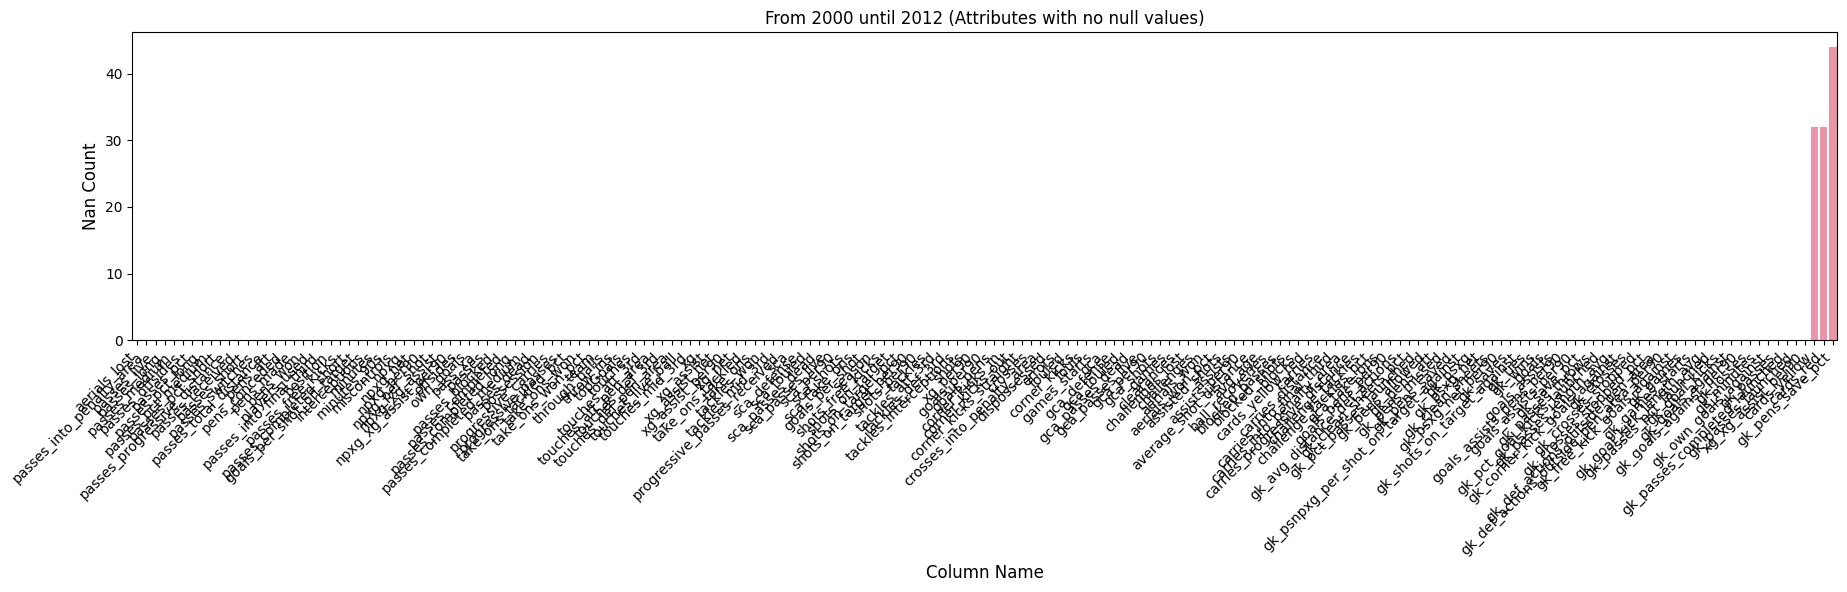

In [8]:
df = pd.read_csv("pastdata.csv")
df_detail_nan = []

for season in df['season'].unique():
    df_nan = df[df['season'] == season]
    series_nan = df_nan.isnull().sum()
    df_nan = series_nan.to_frame(name="Nan_Count")
    df_nan = df_nan.rename_axis('Col_Name').reset_index()
    df_nan['season'] = season
    df_detail_nan.append(df_nan)

df_detail_nan = pd.concat(df_detail_nan, ignore_index=True)

df_per_season_nan = df_detail_nan[['Col_Name','Nan_Count']].groupby("Col_Name").sum().reset_index()
df_per_season_nan = df_per_season_nan.sort_values(by=['Nan_Count'], ascending=True)

# Filter the DataFrame to only include attributes with no null values
df_per_season_nan = df_per_season_nan[df_per_season_nan['Nan_Count'] <= 200]

fig = plt.figure(figsize = (22, 4))
sns.barplot(data=df_per_season_nan, x="Col_Name", y="Nan_Count")
plt.ylabel('Nan Count', fontsize=12)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light', fontsize=10)
plt.xlabel('Column Name', fontsize=12)
plt.title(f"From 2000 until 2012 (Attributes with no null values)", fontsize=12)
plt.show()